<a href="https://colab.research.google.com/github/Rayzon3/Natural-Language-Processing/blob/main/Sentiment_140_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Dataset/sentiment140.csv',
                 encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#renaming cols
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()


,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
#droping other cols
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
y=df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
df_train,df_test,y_train,y_test=train_test_split(df['text'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (1072000,)
DF Test Shape:  (528000,)
Y Train Shape:  (1072000,)
Y Test Shape:  (528000,)


In [ ]:
#building model
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 527470 number of independent tokens


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1072000, 116)

In [ ]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(528000, 116)

In [ ]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 116)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 116, 20)           10549420  
_________________________________________________________________
conv1d (Conv1D)              (None, 114, 32)           1952      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 38, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 36, 64)            6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 10, 128)           24704 

In [ ]:
#training
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(data_train,y_train,validation_data=(data_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
10720/10720 [==============================] - 1389s 129ms/step - loss: 0.4735 - accuracy: 0.7723 - val_loss: 0.4026 - val_accuracy: 0.8168
Epoch 2/5
10720/10720 [==============================] - 1389s 130ms/step - loss: 0.3885 - accuracy: 0.8256 - val_loss: 0.3984 - val_accuracy: 0.8187
Epoch 3/5
10720/10720 [==============================] - 1395s 130ms/step - loss: 0.3688 - accuracy: 0.8361 - val_loss: 0.3963 - val_accuracy: 0.8208
Epoch 4/5
10720/10720 [==============================] - 1388s 129ms/step - loss: 0.3548 - accuracy: 0.8432 - val_loss: 0.3964 - val_accuracy: 0.8201
Epoch 5/5
10720/10720 [==============================] - 1385s 129ms/step - loss: 0.3437 - accuracy: 0.8493 - val_loss: 0.4004 - val_accuracy: 0.8197


In [ ]:
y_pred=model.predict(data_test)
y_pred

array([[6.7027742e-01, 2.9127542e-10, 3.2368302e-10, 3.7729303e-10,
        3.2972252e-01],
       [6.0651785e-01, 5.7593456e-34, 7.4746159e-34, 1.3932282e-33,
        3.9348215e-01],
       [2.6055229e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        7.3944777e-01],
       ...,
       [2.8348763e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.7165120e-01],
       [7.4045295e-01, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.5954705e-01],
       [8.7155557e-01, 2.2036267e-26, 2.3018698e-26, 3.4826178e-26,
        1.2844449e-01]], dtype=float32)

In [ ]:
import numpy as np

y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 4, ..., 4, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(33.0, 0.5, 'y_pred')

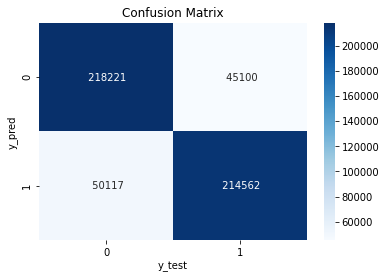

In [ ]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82    263321
           4       0.83      0.81      0.82    264679

    accuracy                           0.82    528000
   macro avg       0.82      0.82      0.82    528000
weighted avg       0.82      0.82      0.82    528000



In [ ]:
def predict(text, include_neutral=True):
    MAX_SEQUENCE_LENGTH = 116
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=MAX_SEQUENCE_LENGTH)
    # Predict
    score = model.predict([x_test])[0]

    print(score[0])

    if(score[0] <= 0.4):
        label = "Negative"
    if(score[0] > 0.4 and score[0] < 0.6):
        label = "Neutral"
    if(score[0] >= 0.6):
        label = "Positive"

    return {"label" : label,
        "score": float(score[0])}

In [ ]:
predict("Good day today")

0.19815989


{'label': 'Negative', 'score': 0.19815988838672638}